In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import seaborn as sns

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Use Inspector to print the column names and types
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

In [11]:
measurements_df = pd.read_csv('hawaii_measurements.csv')
stations_df = pd.read_csv('hawaii_stations.csv')

In [12]:

columns2 = inspector.get_columns('stations')
for c in columns2:
    print(c['name'], c["type"])

In [13]:
measurements_df['date'] = pd.to_datetime(measurements_df['date'],format="%Y-%m-%d")
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
station    19550 non-null object
date       19550 non-null datetime64[ns]
prcp       18103 non-null float64
tobs       19550 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.0+ KB


In [14]:
Measurement = Base.classes.measurement

In [15]:
session = Session(engine)

In [17]:
measurements_df ['tobs'][0:5]

0    65
1    63
2    74
3    76
4    73
Name: tobs, dtype: int64

# Exploratory Climate Analysis

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.id.desc()).limit(365).all()
    
pdf = pd.DataFrame(precip, columns=['date', 'precipitation'])
pdf.set_index('date', inplace=True)
pdf.head()

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


,precipitation
date,
2017-08-23,0.45
2017-08-22,0.50
2017-08-21,0.56
2017-08-20,NaN
2017-08-19,0.09


<IPython.core.display.Javascript object>


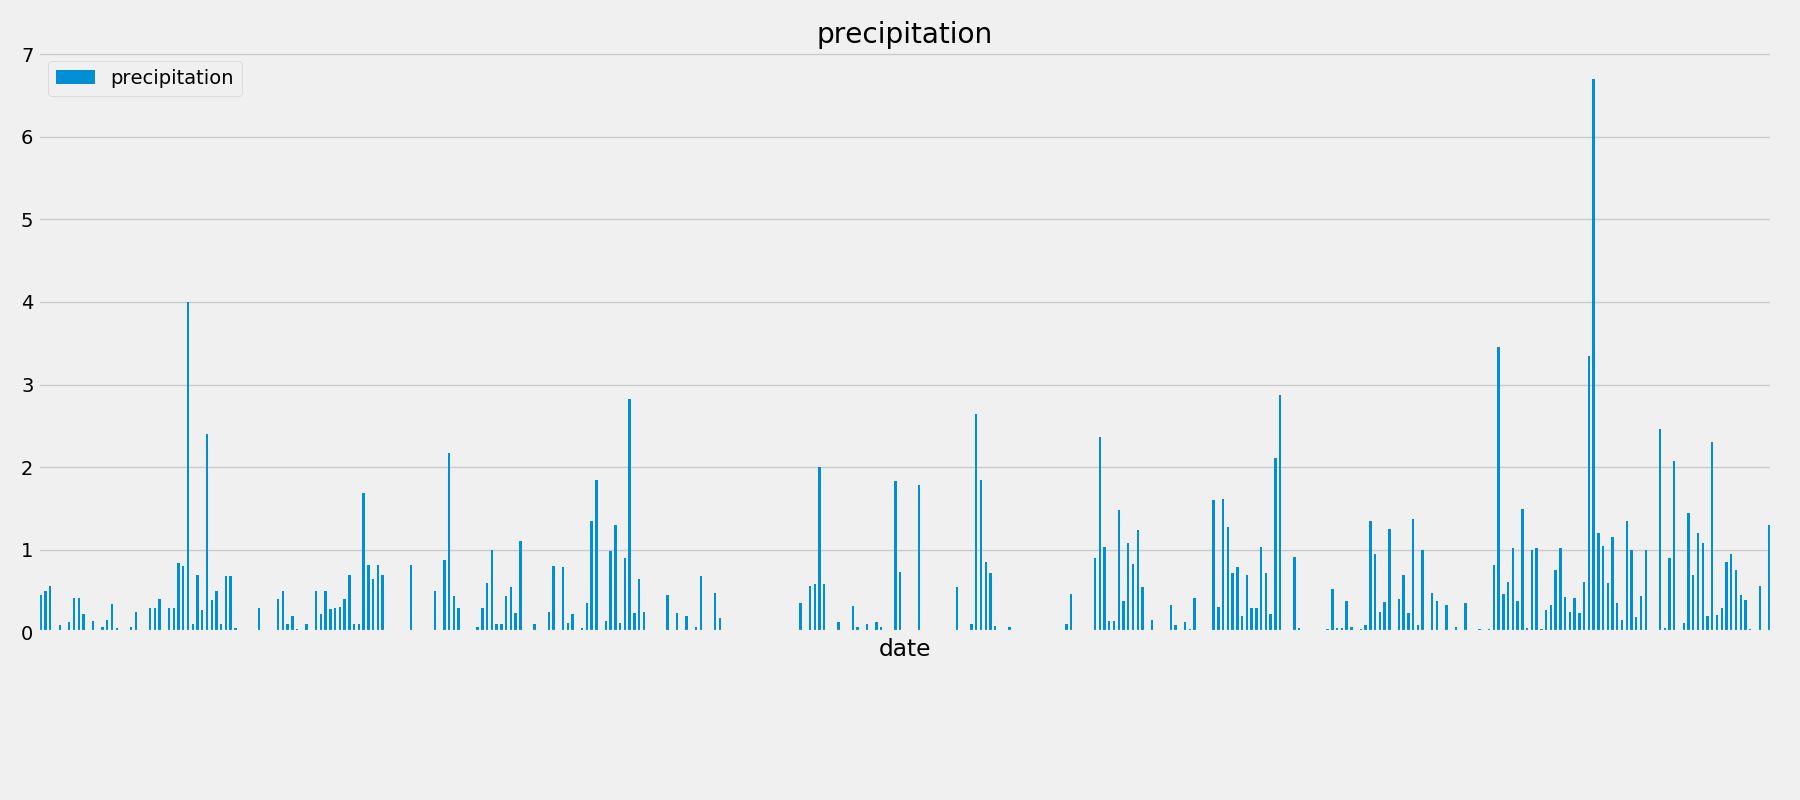

In [32]:
#plot precipitation data
pdf.plot.bar(subplots=True, figsize=(18,8))
plt.tight_layout()
plt.xticks([])
plt.show()

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pdf.describe()

,precipitation
count,344.000000
mean,0.460494
std,0.713201
min,0.000000
25%,0.010000
50%,0.215000
75%,0.657500
max,6.700000


In [35]:
# How many stations are available in this dataset?
session.query(Station.station_id).count()

AttributeError: type object 'station' has no attribute 'station_id'

In [21]:
# What are the most active stations?
sta_obs = pd.DataFrame(session.query(Measurements.station, func.count(Measurements.tobs)).\
        group_by(Measurements.station).\
        order_by(func.count(Measurements.tobs).desc()).all(),
             columns=['station', 'observations #'])
sta_obs

NameError: name 'Measurements' is not defined

In [22]:
#The station with the highest number of observations#The sta 
sta_obs.max()

NameError: name 'sta_obs' is not defined

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sta = pd.DataFrame(session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    order_by(Measurements.id.desc()).limit(365).all(),
             columns=['station', 'date', 'tobs'])
sta.head()

NameError: name 'Measurements' is not defined

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
n_bins = 12
x = np.array(sta['tobs'])
plt.hist(x, n_bins, label='tobs')
plt.legend()
plt.ylabel('Frequency')
plt.show()

NameError: name 'sta' is not defined

In [25]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#create bar chart
means = temp.mean()
errors = temp.max()-temp.min()
fig, ax = plt.subplots()

ax.set_title('Trip Avg Temp')
plt.ylabel('Temps')
means.plot.bar(yerr=errors, ax=ax)


NameError: name 'temp' is not defined

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
